In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('./Agriculture_sector.csv')

In [4]:
df.head()

,Quarterly Year,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
0,2003-Q1,92.17,"1,610.20",54.2,18.4
1,2003-Q2,94.55,"1,646.80",54.3,18.2
2,2003-Q3,81.16,"1,485.00",54.4,17.9
3,2003-Q4,86.77,"1,561.10",54.5,18.1
4,2004-Q1,95.21,"1,697.50",54.6,18.3


In [5]:
df['Quarterly Year'] = pd.to_datetime(df['Quarterly Year'])

In [7]:
df.set_index('Quarterly Year', inplace=True)

In [8]:
df.head()

,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
Quarterly Year,,,,
2003-01-01,92.17,"1,610.20",54.2,18.4
2003-04-01,94.55,"1,646.80",54.3,18.2
2003-07-01,81.16,"1,485.00",54.4,17.9
2003-10-01,86.77,"1,561.10",54.5,18.1
2004-01-01,95.21,"1,697.50",54.6,18.3


In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt




In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

def stationarity_tests(timeseries):
    # Perform ADF test
    result_adf = adfuller(timeseries, autolag='AIC')
    adf_statistic = result_adf[0]
    adf_pvalue = result_adf[1]

    # Perform KPSS test
    result_kpss = kpss(timeseries, regression='c', nlags='auto')
    kpss_statistic = result_kpss[0]
    kpss_pvalue = result_kpss[1]

    # Display results
    print("ADF Statistic:", adf_statistic)
    print("ADF p-value:", adf_pvalue)
    print("KPSS Statistic:", kpss_statistic)
    print("KPSS p-value:", kpss_pvalue)

    # Compare p-values with alpha
    if adf_pvalue <= 0.05 and kpss_pvalue > 0.05:
        print("The time series is likely stationary according to the ADF test.")
    elif adf_pvalue > 0.05 and kpss_pvalue <= 0.05:
        print("The time series is likely stationary according to the KPSS test.")
    elif adf_pvalue <= 0.05 and kpss_pvalue <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

    # Recommend differencing if needed
    if adf_pvalue > 0.05:
        print("Differencing may be needed to achieve stationarity based on the ADF test.")
    elif kpss_pvalue > 0.05:
        print("Differencing may be needed to achieve stationarity based on the KPSS test.")

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
stationarity_tests(df['Total Agricultural Production (in million tonnes)'])

ADF Statistic: -1.9700521993571112
ADF p-value: 0.2998565282844685
KPSS Statistic: 1.0446690687239404
KPSS p-value: 0.01
The time series is likely stationary according to the KPSS test.
Differencing may be needed to achieve stationarity based on the ADF test.


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return num_diff_trend, num_diff_seasonal

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])
print(f"Differencing for trend stationarity: {trend_diff}")
print(f"Differencing for seasonality stationarity: {seasonal_diff}")


Differencing for trend stationarity: 2
Differencing for seasonality stationarity: 0


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


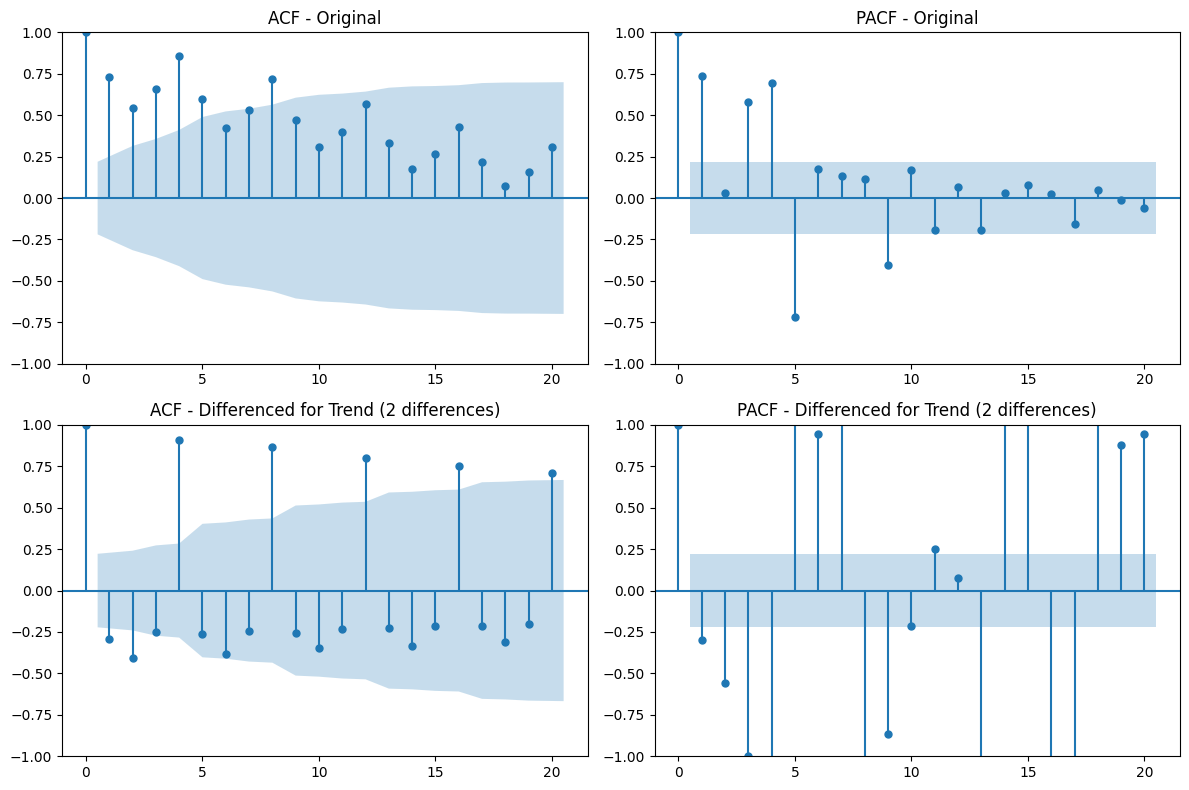

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return timeseries, num_diff_trend, num_diff_seasonal

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])

# Plot ACF and PACF
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original time series
plot_acf(df['Total Agricultural Production (in million tonnes)'], lags=20, ax=ax[0, 0])
plot_pacf(df['Total Agricultural Production (in million tonnes)'], lags=20, ax=ax[0, 1])
ax[0, 0].set_title('ACF - Original')
ax[0, 1].set_title('PACF - Original')

# Differenced for trend stationarity
plot_acf(timeseries, lags=20, ax=ax[1, 0])
plot_pacf(timeseries, lags=20, ax=ax[1, 1])
ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


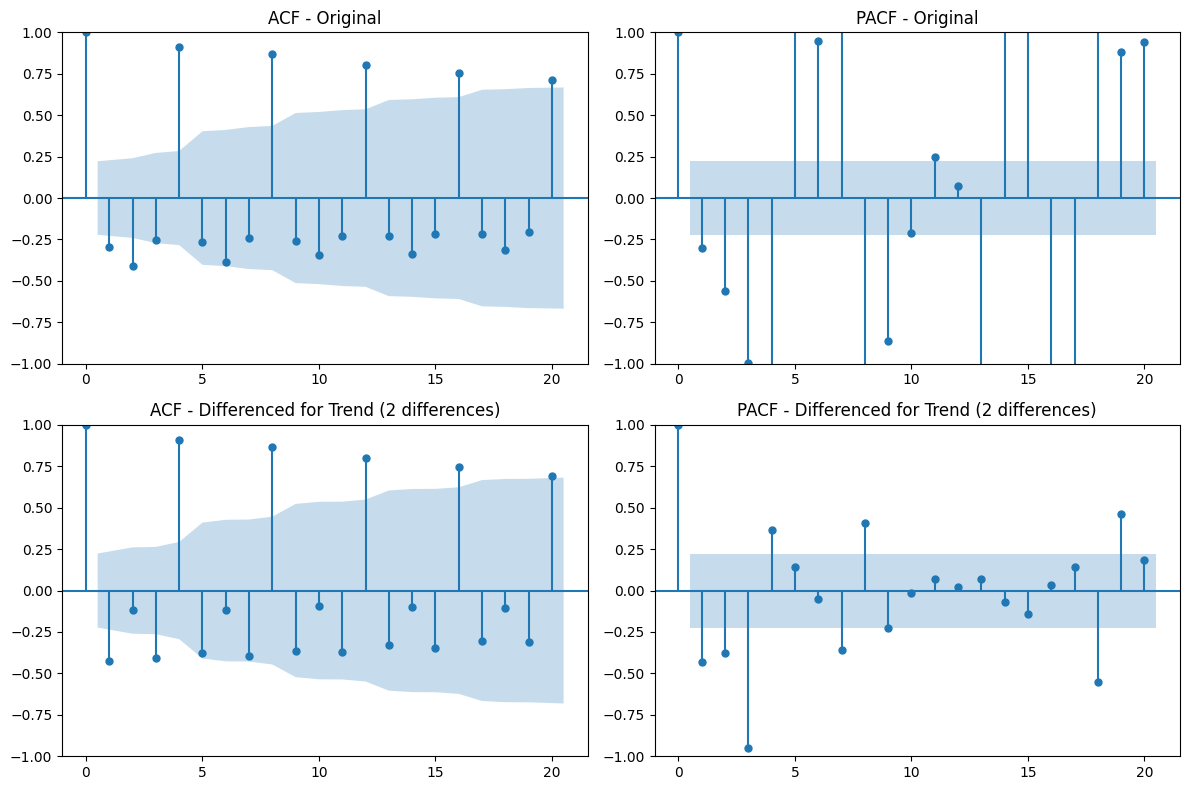

AttributeError: 'Figure' object has no attribute 'significant_lags'

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return timeseries, num_diff_trend, num_diff_seasonal

def print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff):
    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Original time series
    acf_orig = plot_acf(timeseries, lags=20, ax=ax[0, 0])
    pacf_orig = plot_pacf(timeseries, lags=20, ax=ax[0, 1])
    ax[0, 0].set_title('ACF - Original')
    ax[0, 1].set_title('PACF - Original')

    # Differenced for trend stationarity
    acf_diff_trend = plot_acf(timeseries.diff().dropna(), lags=20, ax=ax[1, 0])
    pacf_diff_trend = plot_pacf(timeseries.diff().dropna(), lags=20, ax=ax[1, 1])
    ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
    ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

    plt.tight_layout()
    plt.show()

    # Print significant lags
    print("ACF Original Significant Lags:", acf_orig.significant_lags)
    print("PACF Original Significant Lags:", pacf_orig.significant_lags)
    print("ACF Diff Trend Significant Lags:", acf_diff_trend.significant_lags)
    print("PACF Diff Trend Significant Lags:", pacf_diff_trend.significant_lags)

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])
print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff)


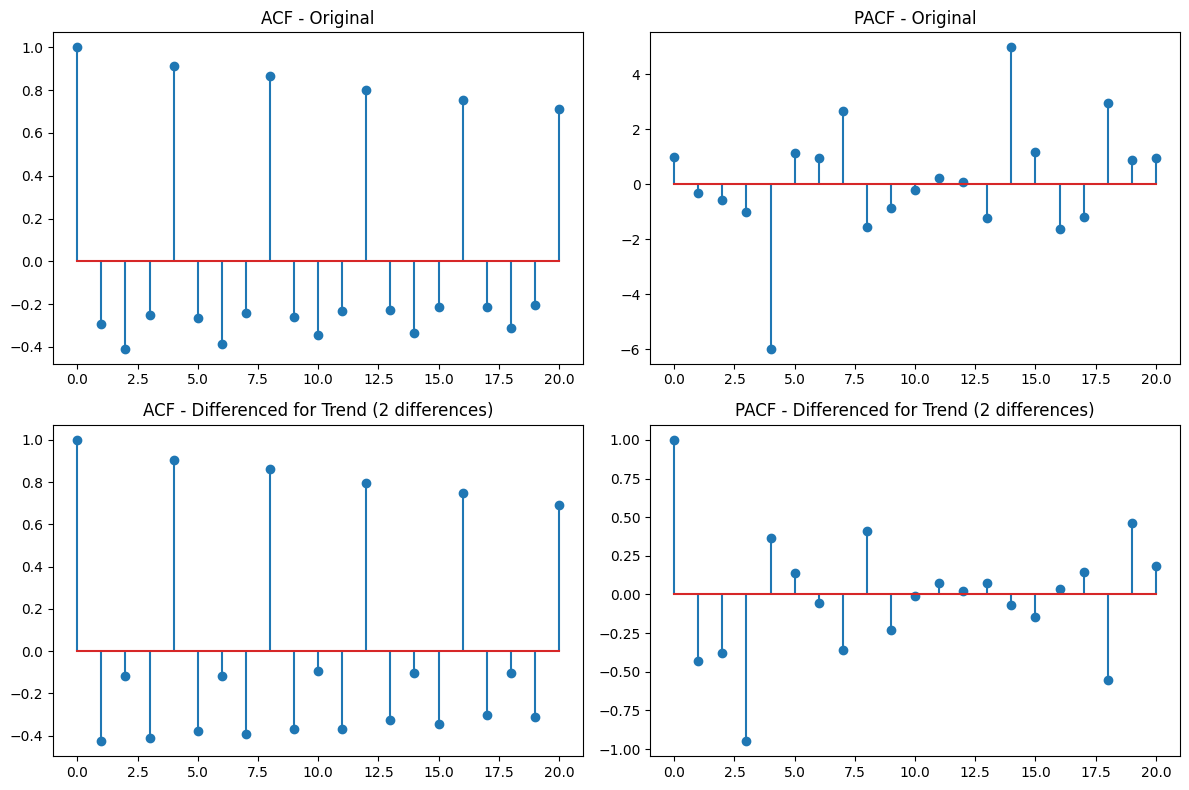

ACF Original Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
PACF Original Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ACF Diff Trend Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
PACF Diff Trend Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20]


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return timeseries, num_diff_trend, num_diff_seasonal

def print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff):
    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Original time series
    acf_orig = acf(timeseries, fft=True, nlags=20)
    pacf_orig = pacf(timeseries, nlags=20)
    ax[0, 0].stem(acf_orig)
    ax[0, 1].stem(pacf_orig)
    ax[0, 0].set_title('ACF - Original')
    ax[0, 1].set_title('PACF - Original')

    # Differenced for trend stationarity
    acf_diff_trend = acf(timeseries.diff().dropna(), fft=True, nlags=20)
    pacf_diff_trend = pacf(timeseries.diff().dropna(), nlags=20)
    ax[1, 0].stem(acf_diff_trend)
    ax[1, 1].stem(pacf_diff_trend)
    ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
    ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

    plt.tight_layout()
    plt.show()

    # Print significant lags
    print("ACF Original Significant Lags:", [i for i, val in enumerate(acf_orig) if abs(val) > 1.96/len(timeseries)])
    print("PACF Original Significant Lags:", [i for i, val in enumerate(pacf_orig) if abs(val) > 1.96/len(timeseries)])
    print("ACF Diff Trend Significant Lags:", [i for i, val in enumerate(acf_diff_trend) if abs(val) > 1.96/len(timeseries)])
    print("PACF Diff Trend Significant Lags:", [i for i, val in enumerate(pacf_diff_trend) if abs(val) > 1.96/len(timeseries)])

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])
print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff)




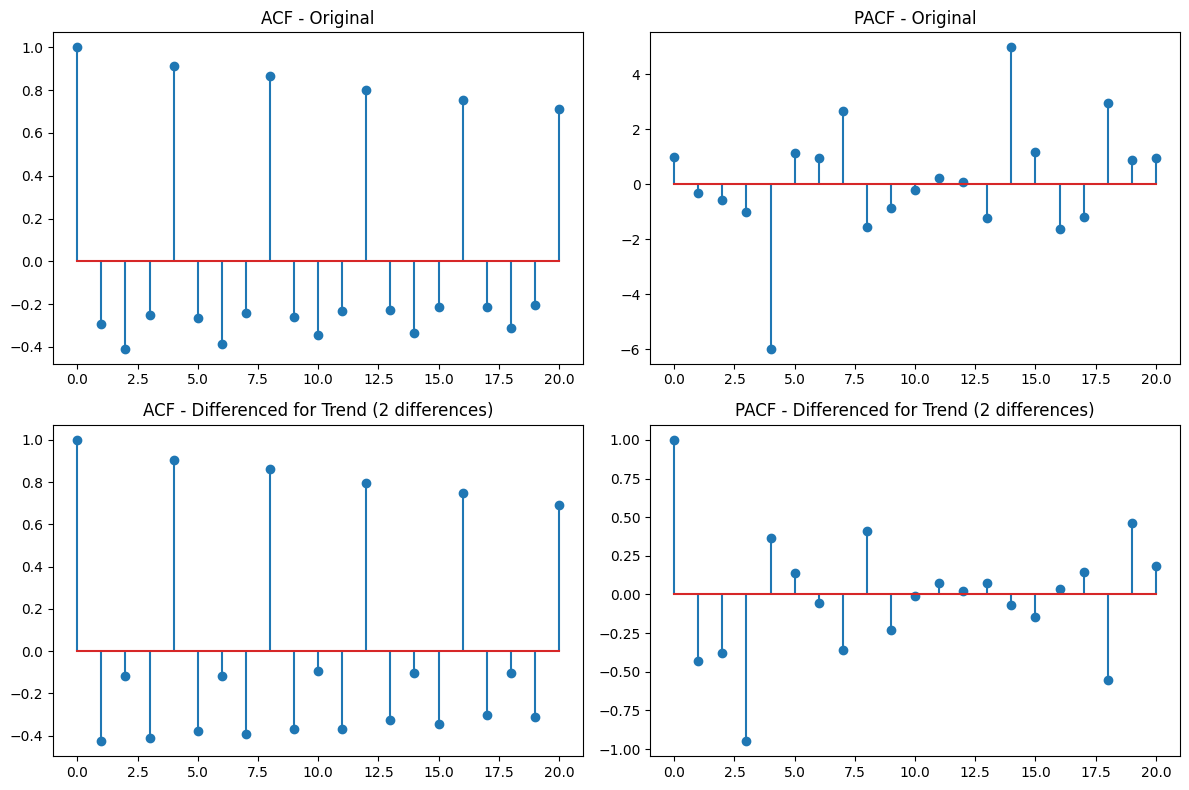

ACF Original Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20]
PACF Original Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20]
ACF Diff Trend Significant Lags: [0, 1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 19, 20]
PACF Diff Trend Significant Lags: [0, 1, 2, 3, 4, 7, 8, 9, 18, 19]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return timeseries, num_diff_trend, num_diff_seasonal

def print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff):
    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Original time series
    acf_orig = acf(timeseries, fft=True, nlags=20)
    pacf_orig = pacf(timeseries, nlags=20)
    ax[0, 0].stem(acf_orig)
    ax[0, 1].stem(pacf_orig)
    ax[0, 0].set_title('ACF - Original')
    ax[0, 1].set_title('PACF - Original')

    # Differenced for trend stationarity
    acf_diff_trend = acf(timeseries.diff().dropna(), fft=True, nlags=20)
    pacf_diff_trend = pacf(timeseries.diff().dropna(), nlags=20)
    ax[1, 0].stem(acf_diff_trend)
    ax[1, 1].stem(pacf_diff_trend)
    ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
    ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

    plt.tight_layout()
    plt.show()

    # Print significant lags
    def find_significant_lags(acf_values):
        conf_interval = 1.96 / len(timeseries)**0.5
        return [i for i, val in enumerate(acf_values) if abs(val) > conf_interval]

    print("ACF Original Significant Lags:", find_significant_lags(acf_orig))
    print("PACF Original Significant Lags:", find_significant_lags(pacf_orig))
    print("ACF Diff Trend Significant Lags:", find_significant_lags(acf_diff_trend))
    print("PACF Diff Trend Significant Lags:", find_significant_lags(pacf_diff_trend))

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])
print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff)


In [26]:
my_list = [0, 1, 2, 3, 4, 7, 8, 9, 18, 19]
my_list.remove(0)
break_index = next((i for i, (a, b) in enumerate(zip(my_list, my_list[1:]), start=1) if b != a + 1), None)
if break_index is not None:
    print(len(my_list[:break_index]))
else:
    print("The list is continuous without breaks.")


4


## Testing For Regression Model

In [1]:
import pandas as pd

In [2]:
file = 'Datasets/Agriculture/Agriculture_sector.csv'

In [51]:
df = pd.read_csv(file)

In [52]:
df.head()

,Quarterly Year,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
0,2003-Q1,92.17,"1,610.20",54.2,18.4
1,2003-Q2,94.55,"1,646.80",54.3,18.2
2,2003-Q3,81.16,"1,485.00",54.4,17.9
3,2003-Q4,86.77,"1,561.10",54.5,18.1
4,2004-Q1,95.21,"1,697.50",54.6,18.3


In [37]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

In [38]:
for i in range(1, 5):
    if df.iloc[:, i].dtype == 'object':
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
    df.iloc[:, i] = df.iloc[:, i].astype(float)

In [39]:
df.set_index(df.columns[0], inplace=True)

In [71]:
df.head()


,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
Quarterly Year,,,,
2003-01-01,92.17,1610.2,54.2,18.4
2003-04-01,94.55,1646.8,54.3,18.2
2003-07-01,81.16,1485.0,54.4,17.9
2003-10-01,86.77,1561.1,54.5,18.1
2004-01-01,95.21,1697.5,54.6,18.3


In [ ]:
df['Total Agricultural Revenues (in billion INR)']

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [72]:
model = LinearRegression()

# Prepare the data
X = np.array(df.index).astype(int)  # Convert datetime to numerical
X = X.reshape(-1, 1)
y = df['Total Agricultural Revenues (in billion INR)'].values

# Fit the model
model.fit(X, y)

# Predict the value for a future date, for example, '2020-04-01'
future_date = pd.to_datetime('2003-01-01')
future_date_numeric = np.array([future_date.timestamp()]).astype(int).reshape(-1, 1)
predicted_value = model.predict(future_date_numeric)[0]

print(f'Predicted value for {future_date}: {predicted_value}')

Predicted value for 2003-01-01 00:00:00: 3539.1284056415057


In [53]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

In [54]:
from datetime import datetime
import re

def convert_quarter_to_date(quarter_str):
    # Extract year and quarter from the input string
    match = re.match(r'(\d+)-Q(\d+)', quarter_str)
    
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        
        # Calculate the month and day based on the quarter
        month = (quarter - 1) * 3 + 1
        
        # Create a datetime object
        date_object = datetime(year, month, 1)
        
        # Format the datetime object as a string
        result_str = date_object.strftime('%Y-%m-%d')
        
        return result_str

    else:
        raise ValueError("Invalid input format. Please use the format 'YYYY-QX'.")


In [56]:
input_str = "2003-Q1"
output_str = convert_quarter_to_date(input_str)
future_date = pd.to_datetime(output_str)
future_date_numeric = np.array([future_date.timestamp()]).astype(int).reshape(-1, 1)
predicted_value = model.predict(future_date_numeric)[0]

print(f'Predicted value for {future_date}: {predicted_value}')

Predicted value for 2003-01-01 00:00:00: 115.48043752456533


In [ ]:
from datetime import datetime
import re
def convert_quarter_to_date(quarter_str):
    # Extract year and quarter from the input string
    match = re.match(r'(\d+)-Q(\d+)', quarter_str)
    
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        
        # Calculate the month and day based on the quarter
        month = (quarter - 1) * 3 + 1
        
        # Create a datetime object
        date_object = datetime(year, month, 1)
        
        # Format the datetime object as a string
        result_str = date_object.strftime('%Y-%m-%d')
        
        return result_str

    else:
        raise ValueError("Invalid input format. Please use the format 'YYYY-QX'.")

In [89]:
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
import re
import pandas as pd

def process_dataset(file):
    df = pd.read_csv(file)
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
    for i in range(1, 5):
        if df.iloc[:, i].dtype == 'object':
            df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
        df.iloc[:, i] = df.iloc[:, i].astype(float)
    df.set_index(df.columns[0], inplace=True)
    return df

def train_linear_regression_model(df, target_index):

    model = LinearRegression()

    # Prepare the data
    X = np.array(df.index).astype(int)
    X = X.reshape(-1, 1)
    y = df[df.columns[target_index]].values

    model.fit(X, y)

    return model

def predict_future_value(model, future_date_str, target_index):
    target_index = target_index-1
    Q1 = df.iloc[-4][df.columns[target_index]]
    Q2 = df.iloc[-3][df.columns[target_index]]
    Q3 = df.iloc[-2][df.columns[target_index]]
    Q4 = df.iloc[-1][df.columns[target_index]]
    compare = 0
    if future_date_str.split('-')[1]=='Q1':
        compare = Q1
    elif future_date_str.split('-')[1]=='Q2':
        compare = Q2
    elif future_date_str.split('-')[1]=='Q3':
        compare = Q3
    elif future_date_str.split('-')[1]=='Q4':
        compare = Q4
    
    future_date_str = convert_quarter_to_date(future_date_str)
    future_date = pd.to_datetime(future_date_str)
    future_date_numeric = np.array([future_date.timestamp()]).astype(int).reshape(-1, 1)
    model = train_linear_regression_model(df, target_index)
    predicted_value = model.predict(future_date_numeric)[0]

    def calculate_percentage_change(y1, y2):
        return ((y2 - y1) / y1) * 100
    
    perc_change = calculate_percentage_change(compare, predicted_value)
    if perc_change>0:
        perc_change =  f"+{perc_change:.2f}%"
    else:
        perc_change = f"{perc_change:.2f}%"
    return predicted_value, perc_change

def convert_quarter_to_date(quarter_str):
    match = re.match(r'(\d+)-Q(\d+)', quarter_str)
    
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        month = (quarter - 1) * 3 + 1
        date_object = datetime(year, month, 1)
        result_str = date_object.strftime('%Y-%m-%d')
        
        return result_str


df = process_dataset(file = 'Datasets/Agriculture/Agriculture_sector.csv')
future_date_str = '2003-Q1'
predicted_value, perc = predict_future_value(model, future_date_str, 0)
print(f'Predicted value for {future_date_str}: {predicted_value}')
print(perc)


Predicted value for 2003-Q1: 16.10137259804222
+11.04%


In [123]:
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt 

class RegressionPredictor:
    def __init__(self, file):
        self.df = self.process_dataset(file)

    def process_dataset(self, file):
        df = pd.read_csv(file)
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
        for i in range(1, 5):
            if df.iloc[:, i].dtype == 'object':
                df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
            df.iloc[:, i] = df.iloc[:, i].astype(float)
        df.set_index(df.columns[0], inplace=True)
        return df

    def train_linear_regression_model(self, target_index):
        model = LinearRegression()

        # Prepare the data
        X = np.array(self.df.index).astype(int)
        X = X.reshape(-1, 1)
        y = self.df[self.df.columns[target_index]].values

        model.fit(X, y)

        return model

    def predict_future_value(self, future_date_str, target_index):
        target_index = target_index - 1
        Q1 = self.df.iloc[-4][self.df.columns[target_index]]
        Q2 = self.df.iloc[-3][self.df.columns[target_index]]
        Q3 = self.df.iloc[-2][self.df.columns[target_index]]
        Q4 = self.df.iloc[-1][self.df.columns[target_index]]
        compare = 0
        if future_date_str.split('-')[1] == 'Q1':
            compare = Q1
        elif future_date_str.split('-')[1] == 'Q2':
            compare = Q2
        elif future_date_str.split('-')[1] == 'Q3':
            compare = Q3
        elif future_date_str.split('-')[1] == 'Q4':
            compare = Q4

        future_date_str = self.convert_quarter_to_date(future_date_str)
        future_date = pd.to_datetime(future_date_str)
        future_date_numeric = np.array([future_date.timestamp()]).astype(int).reshape(-1, 1)
        model = self.train_linear_regression_model(target_index)
        predicted_value = model.predict(future_date_numeric)[0]

        perc_change = self.calculate_percentage_change(compare, predicted_value)
        if perc_change > 0:
            perc_change = f"+{perc_change:.2f}%"
        else:
            perc_change = f"{perc_change:.2f}%"

        return predicted_value, perc_change

    @staticmethod
    def convert_quarter_to_date(quarter_str):
        match = re.match(r'(\d+)-Q(\d+)', quarter_str)

        if match:
            year = int(match.group(1))
            quarter = int(match.group(2))
            month = (quarter - 1) * 3 + 1
            date_object = datetime(year, month, 1)
            result_str = date_object.strftime('%Y-%m-%d')

            return result_str

    @staticmethod
    def calculate_percentage_change(y1, y2):
        return ((y2 - y1) / y1) * 100
    

    def plot_data_with_prediction(self, target_index, xl, yl, future_date_str, predicted_value):
        model = self.train_linear_regression_model(target_index)

        # Plot historical data
        plt.figure(figsize=(10, 6))
        plt.plot(self.df.index, self.df[self.df.columns[target_index]], label='Historical Data', marker='o')

        # Plot predicted future value
        future_date_str = self.convert_quarter_to_date(future_date_str)
        future_date = pd.to_datetime(future_date_str)

        plt.scatter(future_date, predicted_value, color='red', label='Predicted Future Value')

        plt.title(xl)
        plt.xlabel('Year')
        plt.ylabel(yl)
        plt.legend()
        plt.grid(True)

        return plt.gcf()

    def create_and_save_plot(self, target_index, xl, yl, save_path, future_date_str, predicted_value):
        plot = self.plot_data_with_prediction(target_index, xl, yl, future_date_str=future_date_str, predicted_value=predicted_value)
        plot.savefig(save_path)





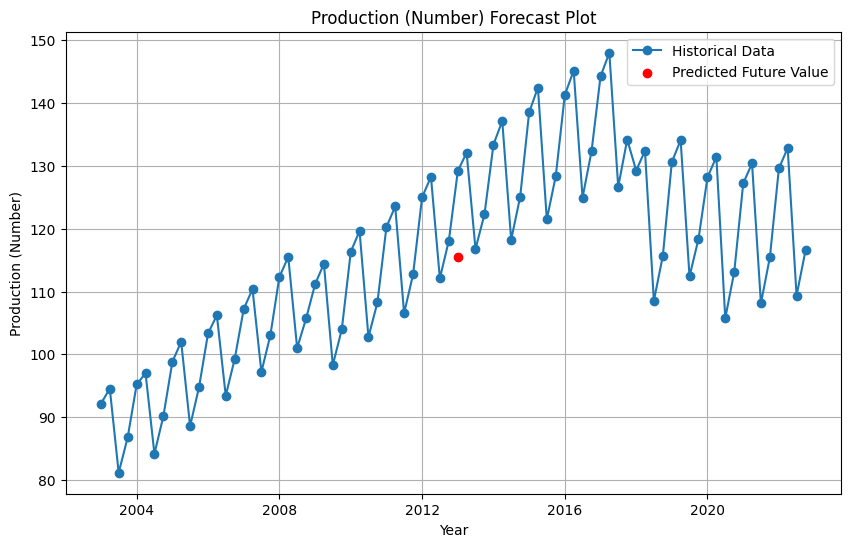

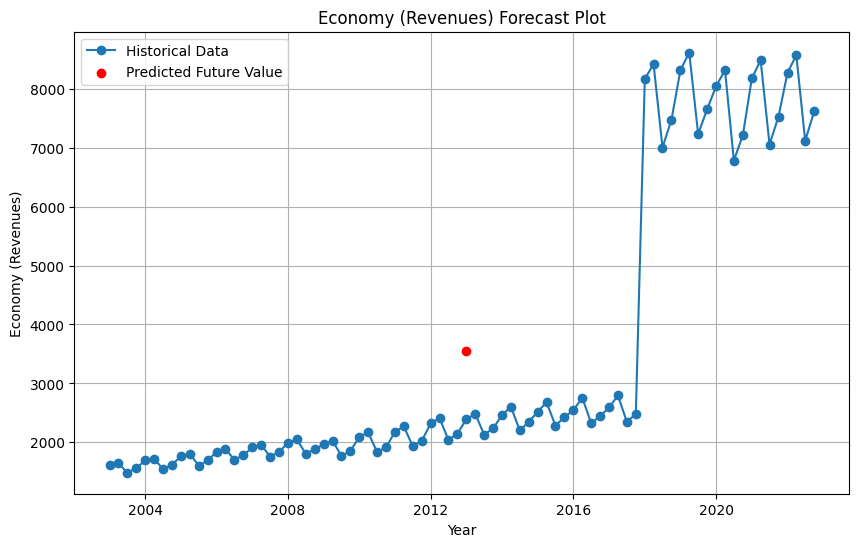

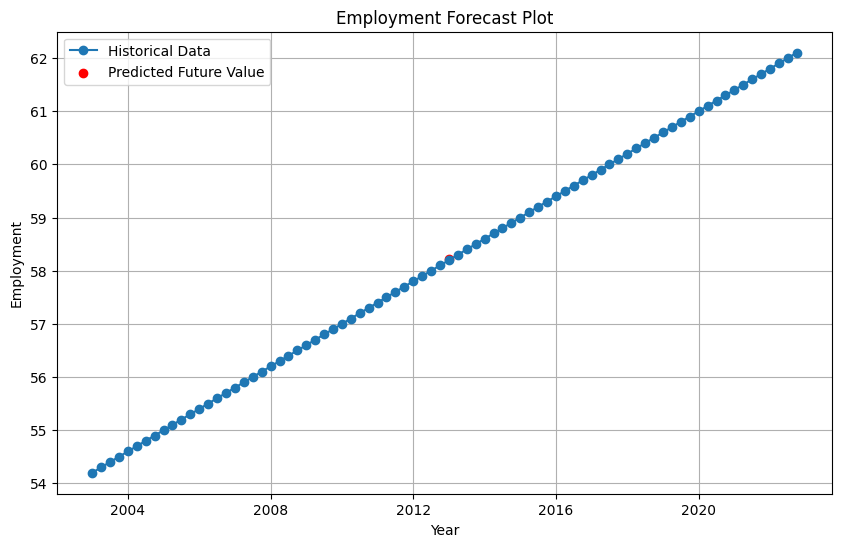

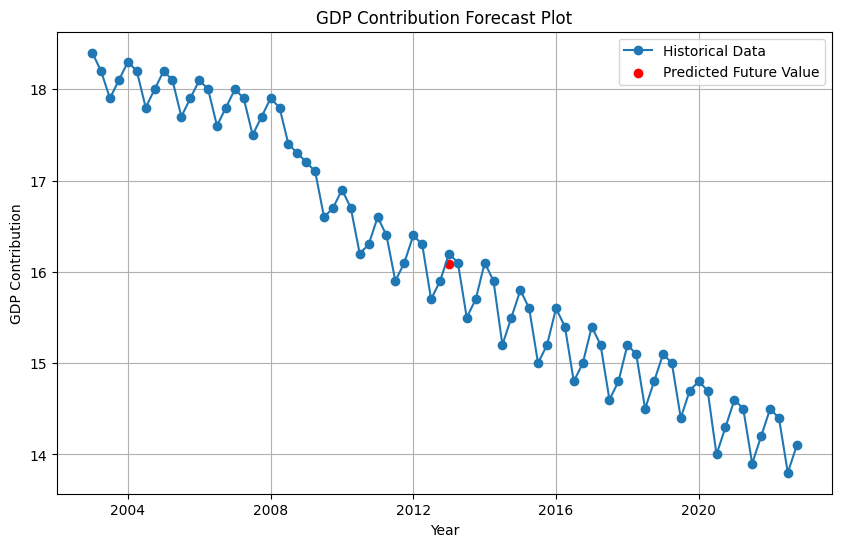

In [126]:
linear_reg_predictor = RegressionPredictor(file='Datasets/Agriculture/Agriculture_sector.csv')
future_date_str = '2013-Q1'
predictions = {'Production (Number)': [0, 0], 'Economy (Revenues)': [0, 0], 'Employment': [0, 0], 'GDP Contribution': [0, 0]}
for i in range(1, 5):
    predicted_value, perc = linear_reg_predictor.predict_future_value(future_date_str, i)
    key = list(predictions.keys())[i-1]
    predictions[key][0] = predicted_value
    predictions[key][1] = perc
    xl = f'{key} Forecast Plot'
    yl = f'{key}'
    linear_reg_predictor.create_and_save_plot(target_index=i-1, xl=xl, yl=yl, save_path=f'Static/ReportPlots/{key}.png', future_date_str=future_date_str, predicted_value=predicted_value)
    

In [105]:
predictions

{'Production/Number': [115.48043752456533, '-10.89%'],
 'Economy/Revenues': [3539.1284056415057, '-57.21%'],
 'Employment': [58.20551577723454, '-5.82%'],
 'GDP Contribution': [16.10137259804222, '+11.04%']}

In [101]:
predicted_value, perc

(16.10137259804222, '+11.04%')

In [ ]:
def create_and_save_plot(agriculture_predictor, target_index, xl, yl, save_path):
    plot = agriculture_predictor.plot_data_with_prediction(target_index)
    plot.savefig(save_path)
    plt.show()

# Example usage:
create_and_save_plot(agriculture_predictor, target_index=0, save_path='path/to/save/figure.png')

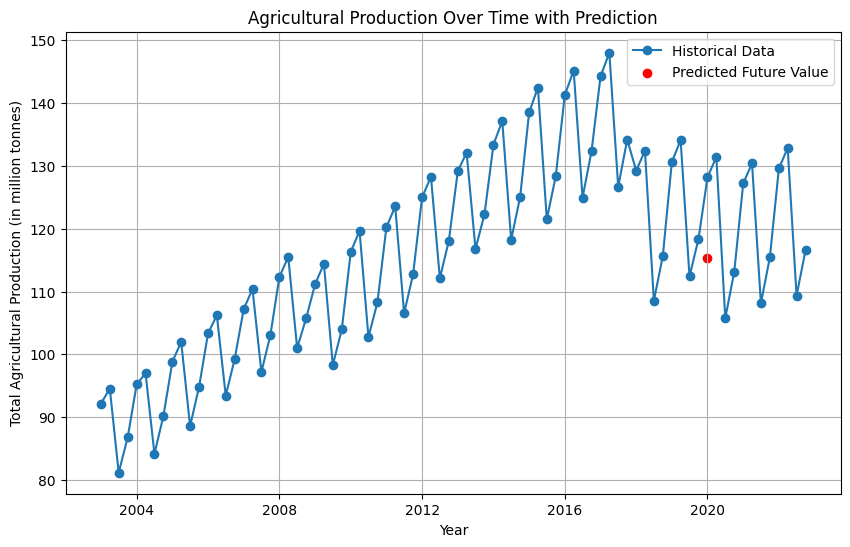

In [97]:
agriculture_predictor = RegressionPredictor(file='Datasets/Agriculture/Agriculture_sector.csv')
agriculture_predictor.plot_data_with_prediction(target_index=0)

In [99]:
import os

def list_files_without_extensions(folder_path):
    file_names = []
    for filename in os.listdir(folder_path):
        # Check if the path is a file (not a directory)
        if os.path.isfile(os.path.join(folder_path, filename)):
            # Split the filename and extension
            name, extension = os.path.splitext(filename)
            # Add the name (without extension) to the list
            file_names.append(name)
    return file_names

# Specify the folder path
folder_path = 'Datasets/Manufacturing'

# Get the list of file names without extensions
file_names_without_extensions = list_files_without_extensions(folder_path)

file_names_without_extensions


['Automobiles',
 'Chemicals',
 'Constuction',
 'Electricity',
 'Electronics and Appliances',
 'Food Processing',
 'Gas',
 'Mining',
 'Pharmaceuticals',
 'Steel',
 'Textiles']